# Mini-Project for Fundamentals of Machine Learning Course
In this study, facial expression recognition was performed on the face images from the Facial Expression Recognition Challenge (FER2013) dataset.

One motivation for representation learning is that learning algorithms can design features more effectively and efficiently than humans can. However, this challenge does not explicitly require entries to use representation learning. The dataset, assembled from the internet, is designed for facial expression classification.

The data consists of grayscale images of faces, each measuring 48x48 pixels. The faces have been automatically aligned to be roughly centered and occupy a similar area within each image. The task is to categorize each face based on the emotion expressed, assigning it to one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral). The dataset contains a total of 35,887 examples.

## 1. Prerequisite
This section provides some basic steps for accessing and visualizing the dataset.

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
def parse_data(data: pd.DataFrame):
    """
    Reads input dataframe then return arrays of images and labels
    """
    image_array = np.zeros(shape=(len(data), 48, 48))
    image_label = np.array(list(map(int, data['emotion'])))

    for i, row in enumerate(data.index):
        image = np.fromstring(data.loc[row, 'pixels'], dtype=int, sep=' ')
        image = np.reshape(image, (48, 48))
        image_array[i] = image

    return image_array, image_label

In [ ]:
def show_img(images: np.ndarray, labels: np.ndarray):
    """
    Visualize images and labels respectively
    """
    _, axarr=plt.subplots(nrows=2, ncols=5, figsize=(18, 9))
    axarr=axarr.flatten()
    for idx, label in enumerate(labels[:10]):
        axarr[idx].imshow(images[idx], cmap='gray')
        axarr[idx].set_xticks([])
        axarr[idx].set_yticks([])
        axarr[idx].set_title("Label:{}".format(label))

In [ ]:
## load dataset here
df = pd.read_csv("../data/icml_face_data.csv")
df.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


The ```emotion``` column contains a numeric code ranging from 0 to 6, inclusive, for the emotion expressed by the image. The "pixels" column contains a string surrounded in quotes for each image.

In [ ]:
## parsing data here
images, labels = parse_data(df)

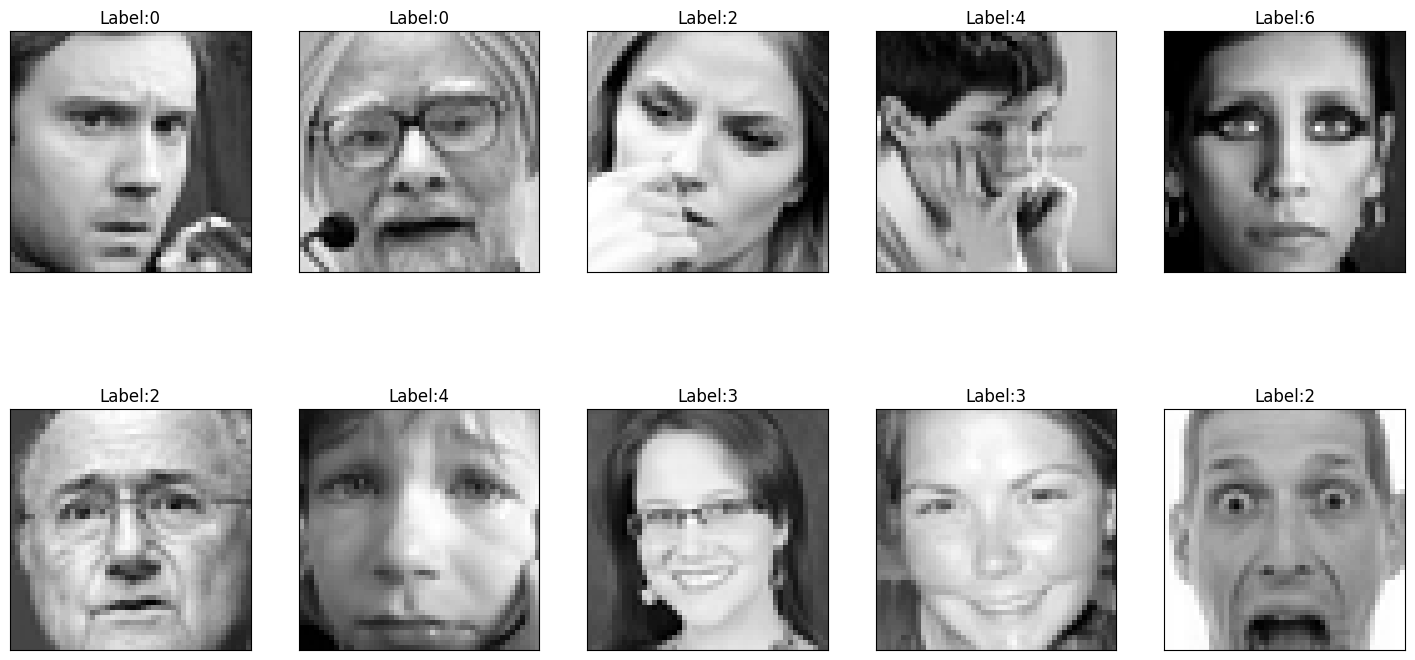

In [ ]:
## showing images here
show_img(images, labels)

## 2. Principle Component Analysis

Unsupervised learning can be further categorized into two main tasks: data transformation and clustering. In this study, we will focus on data transformation using unsupervised learning techniques. These techniques aim to modify the data to make it easier for computers and humans to analyze and understand.

One of the most common applications of unsupervised data transformation is dimensionality reduction. This process reduces the number of features (dimensions) in the data. When the data has a high number of features, it can be computationally expensive and difficult to analyze. Dimensionality reduction techniques help to overcome these challenges.

Principal Component Analysis (PCA) is a popular technique for dimensionality reduction. It transforms the data into a new set of features called principal components (PCs). These PCs are ordered by their importance, capturing the most significant variations in the data. By selecting a subset of the most informative PCs, we can achieve a significant reduction in data size while preserving the essential information for analysis.

Question 1: Can you visualize the data projected onto two principal components? (2 points)

The original data is projected onto the first two principal components which act as new axes. These two PCs are the directions where the data varies the most. The result can be plotted on a 2D graph, with the first principal component on the x-axis and the second on the y-axis. Each point on this plot corresponds to a data point in the original dataset.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # Initialize PCA with 2 components

num_images, height, width = images.shape
images = images.reshape(num_images, height * width)  # Flatten the images

pca.fit(images)  # Fit the PCA model to the flattened images ## modify images' array to the appropriate shape


PCA(n_components=2)

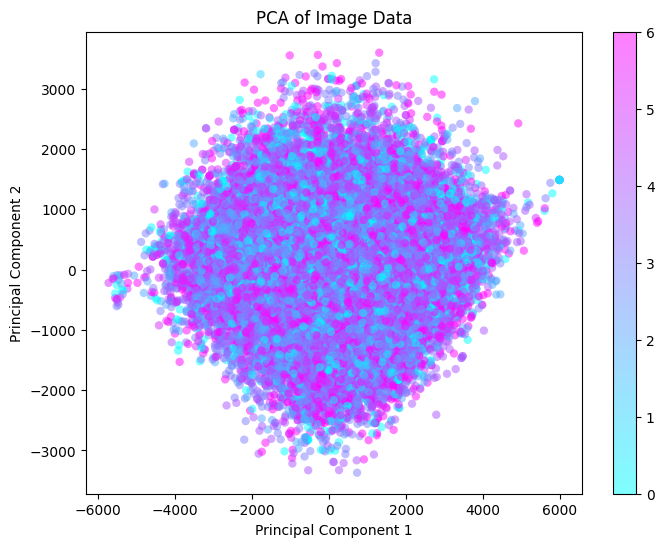

In [ ]:
## transform for visualizing here
images_pca=pca.transform(images) ## modify images' array to the appropriate shape
images_pca.shape

# Visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(images_pca[:, 0], images_pca[:, 1], c = df['emotion'].values, edgecolor='none', alpha=0.5, cmap='cool')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Image Data')
plt.colorbar()
plt.show()



Question 2: How to determine the optimal number of principal components using ```pca.explained_variance_```? Explain your selection process. (2 points)

The selection process:

Eigenvalues Calculation: For each number of PCs (from 1 to 20), PCA is performed on the data, and the eigenvalues are calculated. These eigenvalues represent the amount of variance captured by each principal component.

Storing Last Eigenvalue: The last eigenvalue for each number of PCs is stored in a dictionary. Because when increasing the number of PCs, each additional PC will capture less variance.

Plotting Eigenvalues: A plot is created to visualize how eigenvalues change with different numbers of PCs.

Eigenvalue Cutoff: A horizontal line is drawn at eigenvalue = 1. It suggests that we should only keep PCs with an eigenvalue greater than 1, as they add significant information.

Determining Optimal Components: Iterate through the dictionary to find the maximum number of components where the last eigenvalue is greater than or equal to 1.

Result: The optimal number of principal components is found, which represents the number of PCs that have significant eigenvalues (≥ 1).

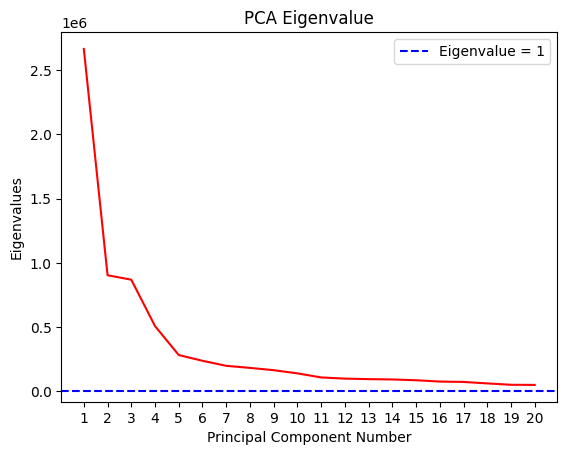

Số lượng thành phần có giá trị riêng ≥ 1: 20



In [ ]:
## Determine the optimal number of Principal Components (PCs) based on the eigenvalues

## Dictionary to store the last eigenvalue for each number of PCs
last_eigenvalue_dict = {}

## Loop over the range of possible number of PCs (from 1 to 20)
for num_pc in range(1, 21):
    pca = PCA(n_components=num_pc)  # Initialize PCA with the current number of components
    transformed_data = pca.fit_transform(images)  # Fit and transform the images data
    eigenvalues = pca.explained_variance_[:num_pc]  # Get the eigenvalues for the current number of components

    ## Store the last eigenvalue in the dictionary
    if num_pc > 0:
        last_eigenvalue_dict[num_pc] = eigenvalues[-1]

## Plot the eigenvalues for each number of components
fig_eigen = plt.figure(1)
fig_eigen.patch.set_facecolor('white')
plt.title('PCA Eigenvalue')
plt.xlabel('Principal Component Number')
plt.ylabel('Eigenvalues')
plt.plot(list(last_eigenvalue_dict.keys()), list(last_eigenvalue_dict.values()), 'r')
plt.axhline(y=1, color='b', linestyle='--', label='Eigenvalue = 1')  # Add a horizontal line at eigenvalue = 1
plt.legend()
plt.xticks(range(1, 21))  # Set integer ticks from 1 to 20 on the x-axis
plt.show()

## Determine the optimal number of components where the last eigenvalue is >= 1
optimal_components_by_eigenvalue = 0
for k, v in last_eigenvalue_dict.items():
    if v >= 1:
        optimal_components_by_eigenvalue = max(optimal_components_by_eigenvalue, k)

## Print the result
print(f'Số lượng thành phần có giá trị riêng ≥ 1: {optimal_components_by_eigenvalue}\n')


From the figure, we can determine that Principal Component Number equal to 5 is optimal for the above problem.

Another selection process using *pca.explained_variance_ratio_*:

This ratio represents the fraction of the total variance is captured by each principal component.

First, calculating the cumulative explained variance, which is the sum of explained variance ratios. This helps to understand how much total variance is explained as we add more components.

Then using *Elbow Method* by plotting the cumulative explained variance against the number of components and looking for an *elbow* in the graph. The *elbow* represents a point where adding more components does not significantly increase the explained variance.

The optimal number of components is where we have enough components to capture a substantial amount of variance without including unnecessary components that do not add much value.

<Figure size 800x600 with 0 Axes>

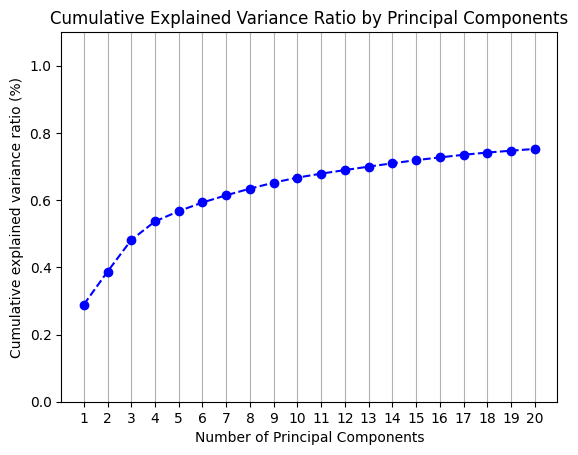

In [ ]:
# Determine the optimal number of Principal Components (PCs) based on the explained variance ratios

# Array to store the sum of explained variance ratios for each number of PCs
explained_var_ratios = []

# Calculate the cumulative explained variance for each number of principal components
for num_pc in range(1, 21):
    pca = PCA(n_components=num_pc)
    pca.fit(images)
    explained_var_ratios.append(np.sum(pca.explained_variance_ratio_))

plt.figure(figsize=(8, 6))
fig, ax = plt.subplots()

# Set integer ticks from 1 to 20 on the x-axis
xi = np.arange(1, 21, step=1)
y = np.array(explained_var_ratios)

# Set the y-axis limits
plt.ylim(0.0, 1.1)

# Plot the cumulative explained variance ratio
plt.plot(xi, y, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.xticks(np.arange(1, 21, step=1))
plt.ylabel('Cumulative explained variance ratio (%)')
plt.title('Cumulative Explained Variance Ratio by Principal Components')
ax.grid(axis='x')
plt.show()


Based on the figure above, we can determine the optimal number of Principal Components is 5. This is the point at which the curve begins to flatten (elbow). After this point, adding more Principal Components does not contribute too much to increasing the explained variance ratio.

## 3. Image Classification

The classification task will compare the performance using both:

- Original data: The data before applying PCA.
- Transformed data: The data projected onto the optimal number of principal components identified earlier. Utilize the **optimal number of principal components** identified in the previous question.

Compare the performance of **4** different classification algorithms (3 machine learning and 1 MLP models) in both formats above. (4 points)

Perform hyperparameter tuning using ```GridSearchCV``` for each classification method. (1 point)

Inspiration: Draw inspiration from the example provided in the scikit-learn documentation: https://scikit-learn.org/dev/auto_examples/datasets/plot_iris_dataset.html

In this project, we use 4 algorithms including Logistic Regression, Support Vector Machine, Naive Bayes and MLP Classifier from neural network. Subsequently, we build all four model related to 4 algorithms mentioned above and measure the performance of each model on both original data and transformed data (data after applied PCA). In each model, we perform hyperparameters tuning using GridSearchCV to find the best parameters for the corresponding model.

In [ ]:
## Splitting data into train/val/test subsets
from sklearn.model_selection import train_test_split

X = df['pixels']
y = df['emotion']

## First split to create training set and remaining set
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.2, random_state=42)

## Second split to create validation and test sets from remaining set
X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=42)

## Print the sizes of each subset
print("Kích thước của tập huấn luyện:", X_train.shape[0])
print("Kích thước của tập validation:", X_val.shape[0])
print("Kích thước của tập kiểm tra:", X_test.shape[0])


Kích thước của tập huấn luyện: 28709
Kích thước của tập validation: 3589
Kích thước của tập kiểm tra: 3589


In [ ]:
# Apply PCA with 5 components
pca = PCA(n_components=5)
X_pca = pca.fit_transform(images)

# Split the PCA-transformed data into training and remaining sets
X_train_pca, X_remaining_pca, y_train_pca, y_remaining = train_test_split(X_pca, labels, test_size=0.2, random_state=42)

# Split the remaining data into validation and test sets
X_val_pca, X_test_pca, y_val_pca, y_test_pca = train_test_split(X_remaining_pca, y_remaining, test_size=0.5, random_state=42)

# Print the sizes of the training, validation, and test sets
print("Kích thước của tập huấn luyện:", X_train_pca.shape[0])
print("Kích thước của tập validation:", X_val_pca.shape[0])
print("Kích thước của tập kiểm tra:", X_test_pca.shape[0])


Kích thước của tập huấn luyện: 28709
Kích thước của tập validation: 3589
Kích thước của tập kiểm tra: 3589


In [ ]:
# Convert training, validation, and test sets to series of strings
X_train_series = pd.Series(X_train.astype(str))
X_val_series = pd.Series(X_val.astype(str))
X_test_series = pd.Series(X_test.astype(str))

# Split the strings back into arrays of integers
X_train = np.array([np.array(x.split(), dtype='int64') for x in X_train_series])
X_val = np.array([np.array(x.split(), dtype='int64') for x in X_val_series])
X_test = np.array([np.array(x.split(), dtype='int64') for x in X_test_series])

# Print the shapes of the resulting arrays
print("X_train:", X_train.shape)
print("X_val:", X_val.shape)
print("X_test:", X_test.shape)


X_train: (28709, 2304)
X_val: (3589, 2304)
X_test: (3589, 2304)


In [ ]:
# Convert PCA-transformed training, validation, and test sets to strings
X_train_pca_series = pd.Series([np.array_str(row) for row in X_train_pca])
X_val_pca_series = pd.Series([np.array_str(row) for row in X_val_pca])
X_test_pca_series = pd.Series([np.array_str(row) for row in X_test_pca])

# Convert the string representations back to arrays
X_train_pca = np.array([np.fromstring(x[1:-1], sep=' ') for x in X_train_pca_series])
X_val_pca = np.array([np.fromstring(x[1:-1], sep=' ') for x in X_val_pca_series])
X_test_pca = np.array([np.fromstring(x[1:-1], sep=' ') for x in X_test_pca_series])

# Print the shapes of the resulting arrays
print("X_train_pca:", X_train_pca.shape)
print("X_val_pca:", X_val_pca.shape)
print("X_test_pca:", X_test_pca.shape)


X_train_pca: (28709, 5)
X_val_pca: (3589, 5)
X_test_pca: (3589, 5)


## Linear Logistic

Original data

In [ ]:
# Import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Function to build a logistic regression model
def logistic_regression_model():
    return make_pipeline(StandardScaler(), LogisticRegression(max_iter=100))

In [ ]:
# Define the grid search parameters for logistic regression
param_grid_logistic = {
    'logisticregression__C': [0.01, 0.1, 1]
}

# Perform grid search with cross-validation to find the best parameters
gridsearch_logistic = GridSearchCV(logistic_regression_model(), param_grid=param_grid_logistic, cv=5, verbose=1, scoring='accuracy')
gridsearch_logistic.fit(X_train, y_train)

print("Best parameters for Logistic Regression: ")
print(gridsearch_logistic.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best parameters for Logistic Regression: 
{'logisticregression__C': 0.01}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Build the final model with the best parameters
best_params_logistic = gridsearch_logistic.best_params_
model_logistic = make_pipeline(StandardScaler(), LogisticRegression(C=best_params_logistic['logisticregression__C'], max_iter=100))
model_logistic.fit(X_train, y_train)

# Prediction on validation set
pred_logistic_val = model_logistic.predict(X_val)
print("Classification report on validation set (Original Data):")
print(classification_report(y_val, pred_logistic_val))
print("Confusion matrix on validation set (Original Data):")
print(confusion_matrix(y_val, pred_logistic_val))

# Prediction on test set
pred_logistic_test = model_logistic.predict(X_test)
print("Classification report on test set (Original Data):")
print(classification_report(y_test, pred_logistic_test))
print("Confusion matrix on test set (Original Data):")
print(confusion_matrix(y_test, pred_logistic_test))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification report on validation set (Original Data):
              precision    recall  f1-score   support

           0       0.28      0.20      0.23       505
           1       0.33      0.02      0.04        42
           2       0.28      0.19      0.22       528
           3       0.43      0.62      0.51       882
           4       0.27      0.28      0.27       613
           5       0.48      0.41      0.45       398
           6       0.34      0.34      0.34       621

    accuracy                           0.36      3589
   macro avg       0.34      0.29      0.29      3589
weighted avg       0.35      0.36      0.35      3589

Confusion matrix on validation set (Original Data):
[[ 99   1  44 146 102  31  82]
 [  5   1  11  10   7   1   7]
 [ 63   1  99 135  99  56  75]
 [ 60   0  55 544 107  25  91]
 [ 69   0  52 175 171  26 120]
 [ 21   0  43  87  38 165  44]
 [ 42   0  55 168 107  37 212]]
Classification report on test set (Original Data):
              precision  

PCA-Transformed data

In [ ]:
# Function to build a logistic regression model with PCA-transformed data
def logistic_regression_model_pca():
    return make_pipeline(StandardScaler(), LogisticRegression(max_iter=100))

In [ ]:
# Define the grid search parameters for logistic regression with PCA
param_grid_logistic_pca = {
    'logisticregression__C': [0.01, 0.1, 1]
}

# Perform grid search with cross-validation to find the best parameters for PCA data
gridsearch_logistic_pca = GridSearchCV(logistic_regression_model_pca(), param_grid=param_grid_logistic_pca, cv=5, verbose=1, scoring='accuracy')
gridsearch_logistic_pca.fit(X_train_pca, y_train_pca)

print("Best parameters for Logistic Regression (PCA): ")
print(gridsearch_logistic_pca.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters for Logistic Regression (PCA): 
{'logisticregression__C': 0.1}


In [ ]:
# Build the final model with the best parameters for PCA data
best_params_logistic_pca = gridsearch_logistic_pca.best_params_
model_logistic_pca = make_pipeline(StandardScaler(), LogisticRegression(C=best_params_logistic_pca['logisticregression__C'], max_iter=100))
model_logistic_pca.fit(X_train_pca, y_train_pca)

# Prediction on validation set with PCA-transformed data
pred_logistic_val_pca = model_logistic_pca.predict(X_val_pca)
print("Classification report on validation set (Transformed Data):")
print(classification_report(y_val_pca, pred_logistic_val_pca))
print("Confusion matrix on validation set (Transformed Data):")
print(confusion_matrix(y_val_pca, pred_logistic_val_pca))

# Prediction on test set with PCA-transformed data
pred_logistic_test_pca = model_logistic_pca.predict(X_test_pca)
print("Classification report on test set (Transformed Data):")
print(classification_report(y_test_pca, pred_logistic_test_pca))
print("Confusion matrix on test set (Transformed Data):")
print(confusion_matrix(y_test_pca, pred_logistic_test_pca))

Classification report on validation set (Transformed Data):
              precision    recall  f1-score   support

           0       0.07      0.00      0.00       505
           1       0.00      0.00      0.00        42
           2       0.16      0.01      0.02       528
           3       0.26      0.81      0.39       882
           4       0.24      0.17      0.20       613
           5       0.28      0.15      0.20       398
           6       0.24      0.05      0.09       621

    accuracy                           0.26      3589
   macro avg       0.18      0.17      0.13      3589
weighted avg       0.21      0.26      0.17      3589

Confusion matrix on validation set (Transformed Data):
[[  1   0   4 385  73  26  16]
 [  0   0   2  29   4   5   2]
 [  6   0   5 410  55  39  13]
 [  4   0   4 712  89  39  34]
 [  2   0   3 450 105  22  31]
 [  0   0   7 303  14  60  14]
 [  2   0   7 462  91  25  34]]
Classification report on test set (Transformed Data):
              pr

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

## SVM

Original data

In [ ]:
# Import libraries
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [ ]:
# Function to build an SVM model
def build_model_svm():
    return make_pipeline(StandardScaler(), SVC(max_iter=100))

In [ ]:
# Define the grid search parameters for SVM
param_grid_svm = {
    'svc__C': [0.01, 0.1],
    'svc__gamma': [0.01, 0.1],
    'svc__kernel': ['rbf', 'linear']
}

# Perform grid search with cross-validation to find the best parameters
gridsearch_svm = GridSearchCV(build_model_svm(), param_grid=param_grid_svm, cv=5, verbose=1, scoring='accuracy', n_jobs=-1)
gridsearch_svm.fit(X_train, y_train)

print("Best parameters for SVM: ")
print(gridsearch_svm.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters for SVM: 
{'svc__C': 0.1, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [ ]:
# Build the final model with the best parameters
best_params_svm = gridsearch_svm.best_params_
model_svm = make_pipeline(StandardScaler(), SVC(C=best_params_svm['svc__C'], gamma=best_params_svm['svc__gamma'], kernel=best_params_svm['svc__kernel'], max_iter=100))
model_svm.fit(X_train, y_train)

# Prediction on validation set
pred_svm_val = model_svm.predict(X_val)
print("Classification report on validation set (Original Data):")
print(classification_report(y_val, pred_svm_val))
print("Confusion matrix on validation set (Original Data):")
print(confusion_matrix(y_val, pred_svm_val))

# Prediction on test set
pred_svm_test = model_svm.predict(X_test)
print("Classification report on test set (Original Data):")
print(classification_report(y_test, pred_svm_test))
print("Confusion matrix on test set (Original Data):")
print(confusion_matrix(y_test, pred_svm_test))

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Classification report on validation set (Original Data):
              precision    recall  f1-score   support

           0       0.22      0.03      0.05       505
           1       0.24      0.19      0.21        42
           2       0.32      0.02      0.03       528
           3       0.25      0.94      0.40       882
           4       0.47      0.04      0.07       613
           5       0.33      0.01      0.02       398
           6       0.52      0.07      0.13       621

    accuracy                           0.26      3589
   macro avg       0.34      0.19      0.13      3589
weighted avg       0.35      0.26      0.15      3589

Confusion matrix on validation set (Original Data):
[[ 15   3   5 466   6   3   7]
 [  3   8   1  30   0   0   0]
 [  5   3   9 501   3   1   6]
 [ 13   7   5 830  11   2  14]
 [ 12   7   3 553  24   1  13]
 [  6   1   1 381   3   4   2]
 [ 14   4   4 548   4   1  46]]
Classification report on test set (Original Data):
              precision  

PCA-Transformed data

In [ ]:
# Function to build an SVM model with PCA-transformed data
def build_model_svm_pca():
    return make_pipeline(StandardScaler(), SVC(max_iter=100))

In [ ]:
# Define the grid search parameters for SVM with PCA
param_grid_svm_pca = {
    'svc__C': [0.01, 0.1],
    'svc__gamma': [0.01, 0.1],
    'svc__kernel': ['rbf', 'linear']
}

# Perform grid search with cross-validation to find the best parameters for PCA data
gridsearch_svm_pca = GridSearchCV(build_model_svm_pca(), param_grid=param_grid_svm_pca, cv=5, verbose=1, scoring='accuracy', n_jobs=-1)
gridsearch_svm_pca.fit(X_train_pca, y_train_pca)

print("Best parameters for SVM (PCA): ")
print(gridsearch_svm_pca.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters for SVM (PCA): 
{'svc__C': 0.1, 'svc__gamma': 0.01, 'svc__kernel': 'linear'}


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [ ]:
# Build the final model with the best parameters for PCA data
best_params_svm_pca = gridsearch_svm_pca.best_params_
model_svm_pca = make_pipeline(StandardScaler(), SVC(C=best_params_svm_pca['svc__C'], gamma=best_params_svm_pca['svc__gamma'], kernel=best_params_svm_pca['svc__kernel'], max_iter=100))
model_svm_pca.fit(X_train_pca, y_train_pca)

# Prediction on validation set with PCA-transformed data
pred_svm_val_pca = model_svm_pca.predict(X_val_pca)
print("Classification report on validation set (Transformed Data):")
print(classification_report(y_val_pca, pred_svm_val_pca))
print("Confusion matrix on validation set (Transformed Data):")
print(confusion_matrix(y_val_pca, pred_svm_val_pca))

# Prediction on test set with PCA-transformed data
pred_svm_test_pca = model_svm_pca.predict(X_test_pca)
print("Classification report on test set (Transformed Data):")
print(classification_report(y_test_pca, pred_svm_test_pca))
print("Confusion matrix on test set (Transformed Data):")
print(confusion_matrix(y_test_pca, pred_svm_test_pca))

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Classification report on validation set (Transformed Data):
              precision    recall  f1-score   support

           0       0.13      0.17      0.15       505
           1       0.01      0.02      0.01        42
           2       0.12      0.07      0.09       528
           3       0.22      0.12      0.15       882
           4       0.16      0.12      0.14       613
           5       0.17      0.26      0.21       398
           6       0.18      0.28      0.22       621

    accuracy                           0.16      3589
   macro avg       0.14      0.15      0.14      3589
weighted avg       0.17      0.16      0.16      3589

Confusion matrix on validation set (Transformed Data):
[[ 86  20  34  68  61  90 146]
 [ 11   1   2  10   2   9   7]
 [123  15  35  76  59 105 115]
 [133  34  89 102 132 142 250]
 [123  17  41  73  74  89 196]
 [ 70   2  26  65  42 104  89]
 [118  30  65  74  82  76 176]]
Classification report on test set (Transformed Data):
              pr

## Naive Bayes

Original data

In [ ]:
# Import libraries
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# Function to build the Gaussian Naive Bayes model
def build_model_nb(X, y):
    model = make_pipeline(StandardScaler(), GaussianNB())
    model.fit(X, y)
    return model

# Hyperparameters tuning using GridSearch
params_grid_nb = {
    'gaussiannb__priors': [None],
    'gaussiannb__var_smoothing': np.array([10**-n for n in range(1, 21)])
}
# Performing GridSearch to find the best hyperparameters
gridsearch_nb = GridSearchCV(build_model_nb(X_train, y_train), param_grid = params_grid_nb, cv = 5, verbose = 1, scoring = 'accuracy')

# Fitting the GridSearch on the training data
gridsearch_nb.fit(X_train, y_train)

# Retrieving the best hyperparameters found by GridSearch
print("Best parameters for Gaussian Naive Bayes: ")
print(gridsearch_nb.best_params_)

# Building the final model with the best hyperparameters
model_nb = make_pipeline(StandardScaler(), GaussianNB(priors = gridsearch_nb.best_params_['gaussiannb__priors'], var_smoothing = gridsearch_nb.best_params_['gaussiannb__var_smoothing']))
# Training the final model on the entire training data
model_nb.fit(X_train, y_train)

# Making predictions on the validation set
pred_nb_val = model_nb.predict(X_val)
print("Classification report on validation set:")
print(classification_report(y_val, pred_nb_val))
print("Confusion matrix on validation set:")
print(confusion_matrix(y_val, pred_nb_val))

# Making predictions on the test set
pred_nb_test = model_nb.predict(X_test)
print("Classification report on test set:")
print(classification_report(y_test, pred_nb_test))
print("Confusion matrix on test set:")
print(confusion_matrix(y_test, pred_nb_test))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters for Gaussian Naive Bayes: 
{'gaussiannb__priors': None, 'gaussiannb__var_smoothing': 0.001}
Classification report on validation set:
              precision    recall  f1-score   support

           0       0.24      0.06      0.09       505
           1       0.01      0.10      0.02        42
           2       0.23      0.06      0.09       528
           3       0.40      0.13      0.20       882
           4       0.25      0.41      0.31       613
           5       0.19      0.59      0.29       398
           6       0.28      0.16      0.20       621

    accuracy                           0.21      3589
   macro avg       0.23      0.21      0.17      3589
weighted avg       0.28      0.21      0.20      3589

Confusion matrix on validation set:
[[ 28  76  20  35 155 147  44]
 [  2   4   0   3   9  21   3]
 [ 20  73  31  34 127 210  33]
 [ 29 127  19 116 229 259 103]
 [ 13  88  21  32 252 153  54]
 

PCA-Transformed data

In [ ]:
# Function to build the Gaussian Naive Bayes model for PCA-transformed data
def build_model_nb(X, y):
    model = make_pipeline(StandardScaler(), GaussianNB())
    model.fit(X, y)
    return model

# Hyperparameters tuning using GridSearch
params_grid_nb = {
    'gaussiannb__priors': [None],
    'gaussiannb__var_smoothing': np.array([10**-n for n in range(1, 21)])
}

# Performing GridSearch to find the best hyperparameters
gridsearch_nb = GridSearchCV(build_model_nb(X_train_pca, y_train_pca), param_grid = params_grid_nb, cv = 5, verbose = 1, scoring = 'accuracy')
# Fitting the GridSearch on the training data
gridsearch_nb.fit(X_train_pca, y_train_pca)

# Retrieving the best hyperparameters found by GridSearch
print("Best parameters for Gaussian Naive Bayes: ")
print(gridsearch_nb.best_params_)

# Building the final model with the best hyperparameters
model_nb = make_pipeline(StandardScaler(), GaussianNB(priors = gridsearch_nb.best_params_['gaussiannb__priors'], var_smoothing = gridsearch_nb.best_params_['gaussiannb__var_smoothing']))
# Training the final model on the entire training PCA data
model_nb.fit(X_train_pca, y_train_pca)

# Making predictions on the validation set with PCA-transformed data
pred_nb_val = model_nb.predict(X_val_pca)
print("Classification report on validation set:")
print(classification_report(y_val_pca, pred_nb_val))
print("Confusion matrix on validation set:")
print(confusion_matrix(y_val_pca, pred_nb_val))

# Making predictions on the test set with PCA-transformed data
pred_nb_test = model_nb.predict(X_test_pca)
print("Classification report on test set:")
print(classification_report(y_test_pca, pred_nb_test))
print("Confusion matrix on test set:")
print(confusion_matrix(y_test_pca, pred_nb_test))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters for Gaussian Naive Bayes: 
{'gaussiannb__priors': None, 'gaussiannb__var_smoothing': 0.1}
Classification report on validation set:
              precision    recall  f1-score   support

           0       0.15      0.01      0.02       505
           1       0.00      0.00      0.00        42
           2       0.21      0.01      0.02       528
           3       0.26      0.81      0.39       882
           4       0.26      0.16      0.20       613
           5       0.29      0.11      0.16       398
           6       0.30      0.11      0.16       621

    accuracy                           0.26      3589
   macro avg       0.21      0.17      0.14      3589
weighted avg       0.24      0.26      0.18      3589

Confusion matrix on validation set:
[[  6   0   5 386  68  17  23]
 [  1   0   0  30   4   5   2]
 [  9   0   6 423  39  27  24]
 [  9   0   5 712  79  27  50]
 [  6   0   1 457  97  15  37]
 [ 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

## MLP

Original data

In [ ]:
# Import libraries
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

# Function to build the MLP model with given hyperparameters
def build_model_mlp(alpha, max_iter):
    return make_pipeline(StandardScaler(), MLPClassifier(alpha=alpha, max_iter=max_iter))

# Hyperparameter grid for GridSearch
param_grid_mlp = {
    "mlpclassifier__alpha": [0.01, 0.1],
    "mlpclassifier__max_iter": [200, 300]
}

# Performing GridSearch to find the best hyperparameters
gridsearch_mlp = GridSearchCV(build_model_mlp(0.01, 200), param_grid_mlp, cv=5, scoring="f1_macro", verbose=1)

# Fitting the GridSearch on the training data
gridsearch_mlp.fit(X_train, y_train)

# Retrieving the best hyperparameters found by GridSearch
best_params_mlp = gridsearch_mlp.best_params_
print("Best parameters for MLPClassifier: ", best_params_mlp)

# Extracting the best alpha and max_iter values
best_alpha = best_params_mlp['mlpclassifier__alpha']
best_max_iter = best_params_mlp['mlpclassifier__max_iter']

# Building the final model with the best hyperparameters
model_mlp = build_model_mlp(alpha=best_alpha, max_iter=best_max_iter)

# Training the final model on the entire training data
model_mlp.fit(X_train, y_train)

# Making predictions on the validation set
pred_mlp_val = model_mlp.predict(X_val)
print("Classification report on validation set:")
print(classification_report(y_val, pred_mlp_val))
print("Confusion matrix on validation set:")
print(confusion_matrix(y_val, pred_mlp_val))

# Making predictions on the test set
pred_mlp_test = model_mlp.predict(X_test)
print("Classification report on test set:")
print(classification_report(y_test, pred_mlp_test))
print("Confusion matrix on test set:")
print(confusion_matrix(y_test, pred_mlp_test))


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters for MLPClassifier:  {'mlpclassifier__alpha': 0.1, 'mlpclassifier__max_iter': 300}
Classification report on validation set:
              precision    recall  f1-score   support

           0       0.30      0.32      0.31       505
           1       0.24      0.29      0.26        42
           2       0.33      0.32      0.33       528
           3       0.52      0.55      0.53       882
           4       0.28      0.28      0.28       613
           5       0.51      0.48      0.49       398
           6       0.34      0.33      0.33       621

    accuracy                           0.39      3589
   macro avg       0.36      0.37      0.36      3589
weighted avg       0.39      0.39      0.39      3589

Confusion matrix on validation set:
[[163  10  55  83  90  30  74]
 [  7  12   5   4   4   3   7]
 [ 60   8 168  86  91  42  73]
 [ 92   8  66 482  94  37 103]
 [110   7  81 110 171  33 101]
 [ 22   1  61

PCA-Transformed data

In [ ]:
# Define a function to build a MLP model with specified hyperparameters.
def build_model_mlp(alpha, max_iter):
    return make_pipeline(StandardScaler(), MLPClassifier(alpha=alpha, max_iter=max_iter))

# Define the grid of hyperparameters to search over.
param_grid_mlp = {
    "mlpclassifier__alpha": [0.01, 0.1],
    "mlpclassifier__max_iter": [200, 300]
}

# Perform grid search with cross-validation to find the best hyperparameters.
gridsearch_mlp = GridSearchCV(build_model_mlp(0.01, 200), param_grid_mlp, cv=5, scoring="f1_macro", verbose=1)
gridsearch_mlp.fit(X_train_pca, y_train_pca)

# Retrieve the best hyperparameters from the grid search results.
best_params_mlp = gridsearch_mlp.best_params_
print("Best parameters for MLPClassifier: ", best_params_mlp)

# Use the best hyperparameters to build the final model.
best_alpha = best_params_mlp['mlpclassifier__alpha']
best_max_iter = best_params_mlp['mlpclassifier__max_iter']
model_mlp = build_model_mlp(alpha=best_alpha, max_iter=best_max_iter)

# Train the final model on the training data.
model_mlp.fit(X_train_pca, y_train_pca)

# Evaluate the final model on the validation set.
pred_mlp_val = model_mlp.predict(X_val_pca)
print("Classification report on validation set:")
print(classification_report(y_val_pca, pred_mlp_val))
print("Confusion matrix on validation set:")
print(confusion_matrix(y_val_pca, pred_mlp_val))

# Evaluate the final model on the test set.
pred_mlp_test = model_mlp.predict(X_test_pca)
print("Classification report on test set:")
print(classification_report(y_test_pca, pred_mlp_test))
print("Confusion matrix on test set:")
print(confusion_matrix(y_test_pca, pred_mlp_test))


Fitting 5 folds for each of 4 candidates, totalling 20 fits


c:\Users\ACER\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\ACER\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Best parameters for MLPClassifier:  {'mlpclassifier__alpha': 0.01, 'mlpclassifier__max_iter': 200}
Classification report on validation set:
              precision    recall  f1-score   support

           0       0.21      0.03      0.05       505
           1       0.00      0.00      0.00        42
           2       0.22      0.10      0.14       528
           3       0.29      0.70      0.41       882
           4       0.27      0.30      0.28       613
           5       0.28      0.18      0.22       398
           6       0.30      0.10      0.16       621

    accuracy                           0.28      3589
   macro avg       0.22      0.20      0.18      3589
weighted avg       0.26      0.28      0.23      3589

Confusion matrix on validation set:
[[ 14   0  39 265 128  33  26]
 [  1   0   2  21   8   8   2]
 [ 12   0  54 302  91  45  24]
 [  9   0  49 614 136  40  34]
 [ 10   0  30 329 184  21  39]
 [  8   0  37 233  24  70  26]
 [ 13   0  33 366 110  34  65]]
Classific

c:\Users\ACER\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\ACER\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ACER\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ACER\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined 

## 4. Evaluating Classification Performance

Compare the performance of the different classification models using various metrics: accuracy, precision, recall, and F1-score.
Based on the evaluation metrics, explain which model performs best and why. Identify the emotion category where the model makes the most accurate and most errors. (1 point)



In [ ]:
import seaborn as sns
from sklearn.model_selection import cross_val_score

# Import necessary models
models = [
    LogisticRegression(C=0.1, max_iter=100),
    SVC(C=0.1, gamma=0.01, kernel='rbf'),
    GaussianNB(priors=None, var_smoothing=0.001),
    MLPClassifier(alpha=0.01, max_iter=200)
]

from sklearn.model_selection import StratifiedKFold

def generate_baseline_results(models, X, y, metrics, cv=5, plot_results=False):
    # Initialize StratifiedKFold for cross-validation
    kfold = StratifiedKFold(cv, shuffle=True, random_state=2024)
    entries = []

    # Iterate over each model
    for model in models:
        model_name = model.__class__.__name__

        # Perform cross-validation and store results
        scores = cross_val_score(model, X, y, scoring=metrics, cv=kfold)
        for fold_idx, score in enumerate(scores):
            entries.append((model_name, fold_idx, score))

    # Create DataFrame to hold cross-validation results
    cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_id', 'accuracy_score'])

    # Optionally plot results using seaborn boxplot
    if plot_results:
        sns.boxplot(x='model_name', y='accuracy_score', data=cv_df, color='lightblue', showmeans=True)
        plt.title("Boxplot of Base-Line Model Accuracy using 5-fold cross-validation")
        plt.xticks(rotation=45)
        plt.show()

    # Compute mean and standard deviation of accuracy scores
    mean = cv_df.groupby('model_name')['accuracy_score'].mean()
    std = cv_df.groupby('model_name')['accuracy_score'].std()

    # Combine mean and std into a summary DataFrame
    baseline_results = pd.concat([mean, std], axis=1, ignore_index=True)
    baseline_results.columns = ['Mean', 'Standard Deviation']

    # Sort results by mean accuracy
    baseline_results.sort_values(by=['Mean'], ascending=False, inplace=True)

    return baseline_results

# Generate and print baseline results for specified models
baseline_results = generate_baseline_results(models, X_train, y_train, metrics='accuracy', cv=5, plot_results=False)
print(baseline_results)


c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

                        Mean  Standard Deviation
model_name                                      
LogisticRegression  0.361524            0.003090
MLPClassifier       0.251803            0.000203
SVC                 0.251628            0.000085
GaussianNB          0.211920            0.006356


Based on the table above, the LogisticRegression model performs best on original data.

LogisticRegression has the highest mean value of 0.361524, which suggests it has the best average performance across multiple runs or datasets compared to the other models.

While LogisticRegression has a slightly higher standard deviation (0.003090) than MLPClassifier (0.000203) and SVC (0.000085), indicating a bit less consistency, its much higher mean value outweighs this factor, suggesting better overall performance.

In conclusion, LogisticRegression definitely appears to be the best model applying on original data due to its superior average performance, despite a slightly higher variation in its results.

In [ ]:
# Generate and print baseline results for specified models with PCA transformed data
baseline_results = generate_baseline_results(models, X_train_pca, y_train_pca, metrics='accuracy', cv=5, plot_results=False)
print(baseline_results)

c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

                        Mean  Standard Deviation
model_name                                      
GaussianNB          0.261939            0.002131
LogisticRegression  0.256435            0.004302
SVC                 0.251628            0.000085
MLPClassifier       0.200321            0.018511


Based on the table above, the GaussianNB model seems to perform best on transformed data.

GaussianNB has a mean of 0.261939, which is the highest among the models listed, indicating good average performance.

GaussianNB also has the lowest standard deviation (0.002131) among all models, suggesting it delivers the most consistent results across different runs or datasets.

In conclusion, considering both accuracy (mean) and reliability (standard deviation), GaussianNB appears to offer the best balance of performance applying on transformed data.

The emotion category where the model makes the most accurate is *Happy* and most errors is *Angry*.

Compare performance of models

### Original data

#### Confusion matrix

Linear Logistic

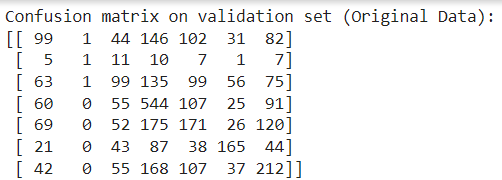

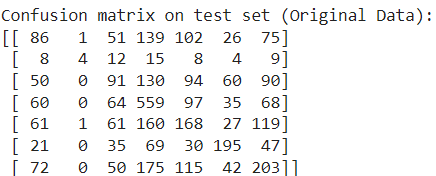

SVM

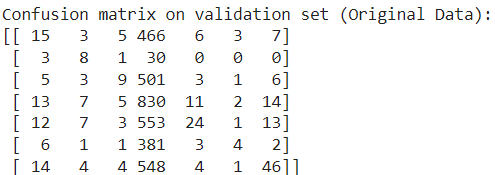

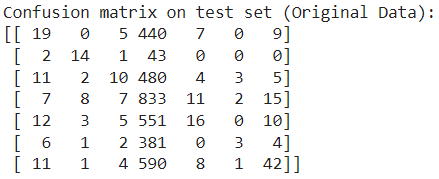

Naive Bayes

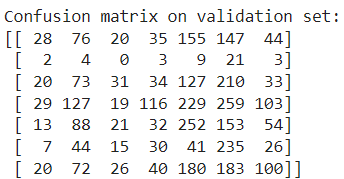

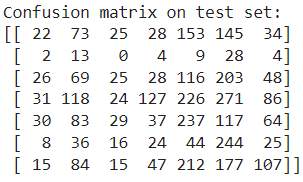

MLP

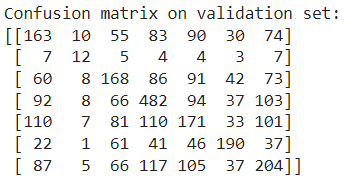

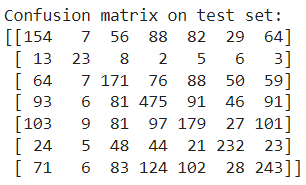

#### Classification report

Linear Logistic

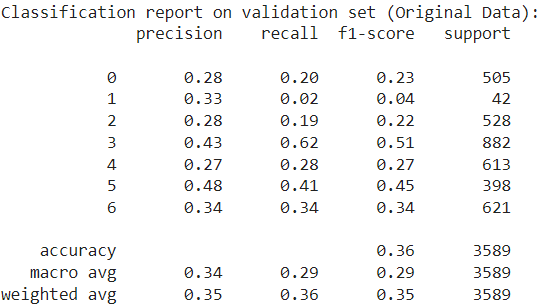

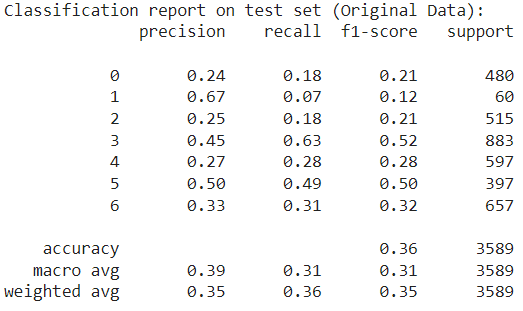

SVM

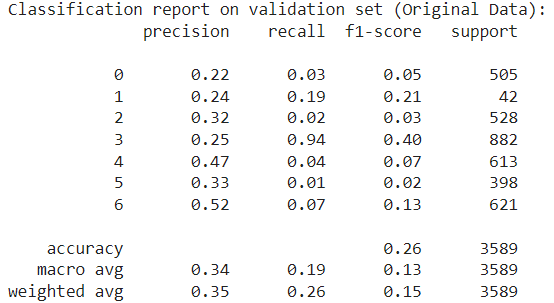

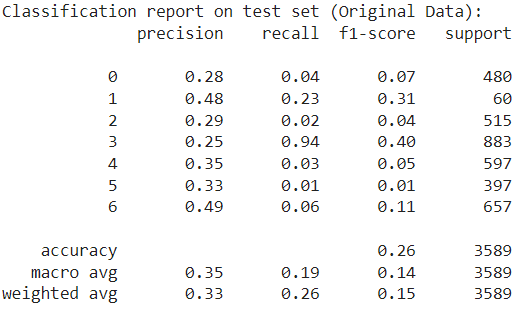

Naive Bayes

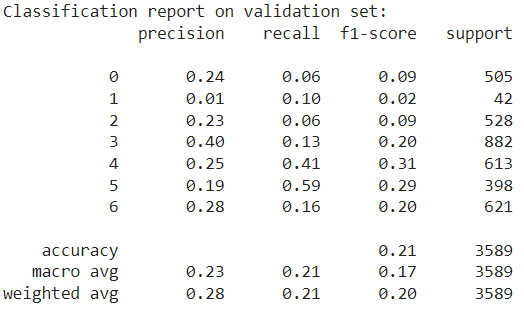

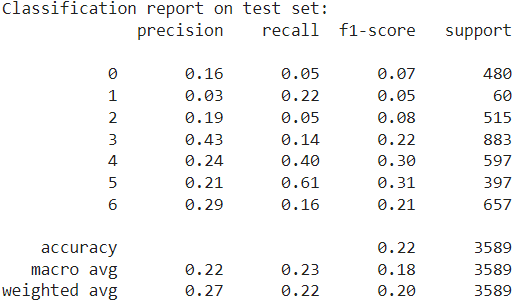

MLP

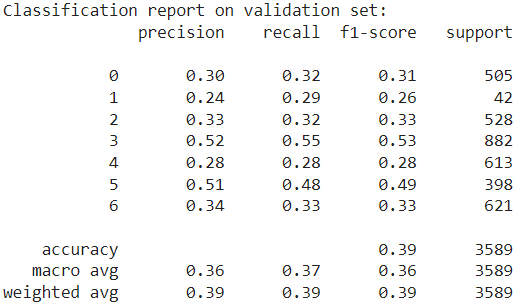

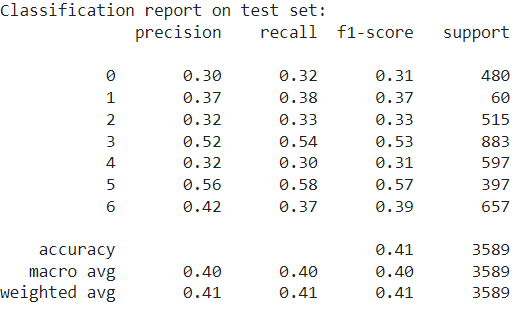

### Transformed data

#### Confusion matrix

Linear Logistic

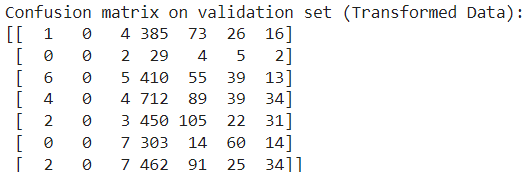

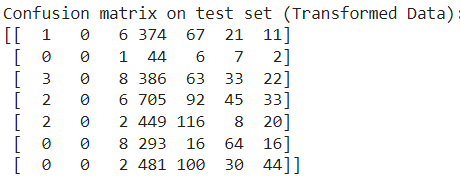

SVM

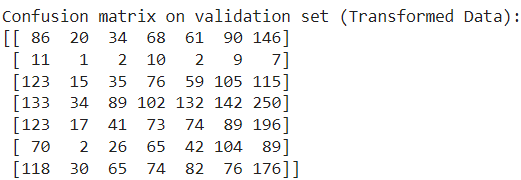

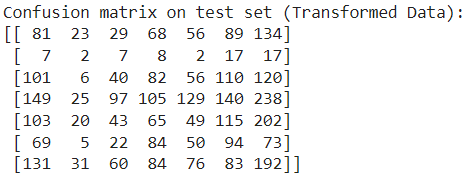

Naive Bayes

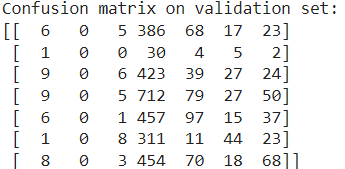

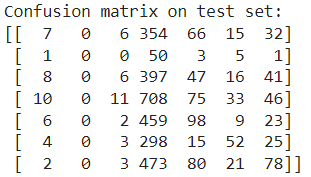

MLP

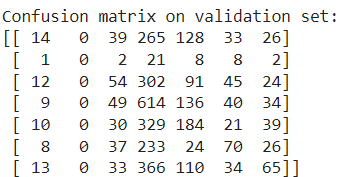

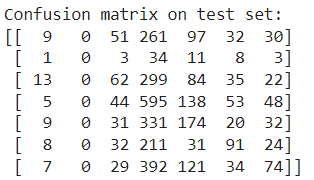

#### Classification report

Linear Logistic

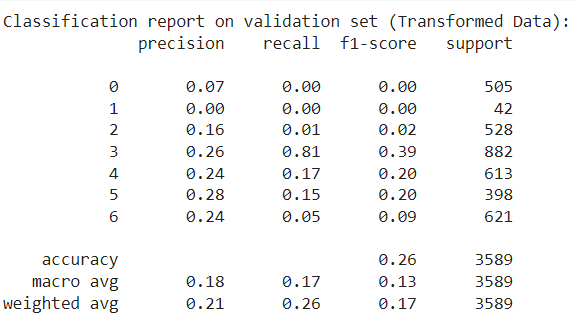

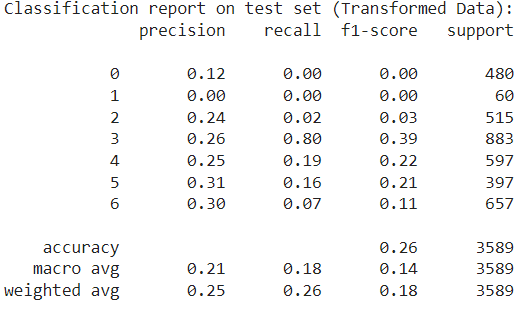

SVM

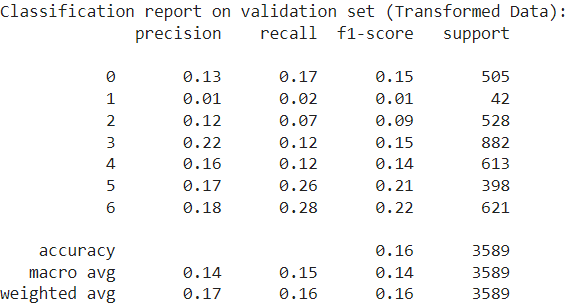

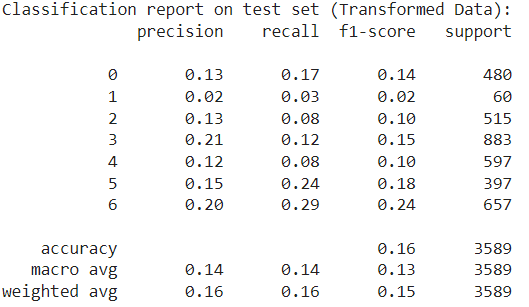

Naive Bayes

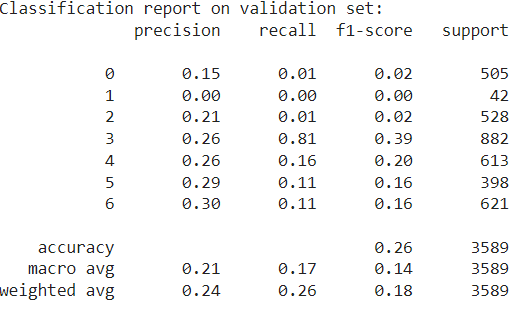

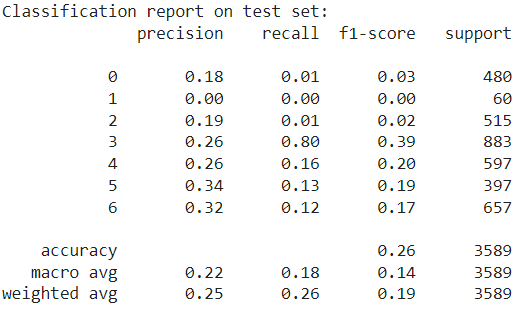

MLP

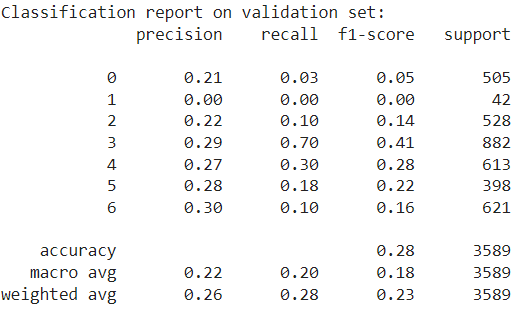

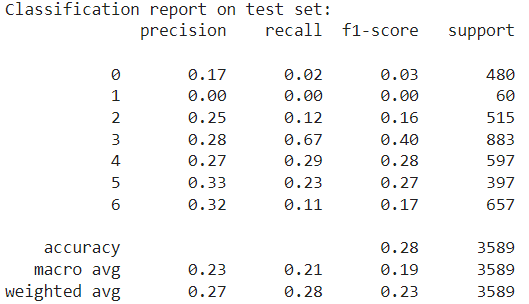